# Multi-Dimensional Scaling (MDS) 란? 
**PCA**
- MDS 설명하기에 앞서 PCA에 관한 간단한 설명을 하겠습니다. 
- PCA는 원본 고 차원의 데이터를 저 차원 초평면에 투영(projection)하는 방법으로 데이터의 분산을 최대화 하며 서로 직교하는 unit vector를 찾는 것을 목적으로 합니다. 

**MDS** 
- MDS 는 PCA와 달리 원본 데이터 필드 상에서의 레코드들 간의 거리를 저차원에서도 최대한 보존하는 것을 목적으로 합니다. 
- 고차원 상에서의 매니폴드로 부터 개체간 거리를 동일하게 유지되는 저차원 공간으로 매핑하는 것을 목적으로 합니다. 
- MDS에서는 데이터의 특징이 다른 객체간의 pairwise-distance가 됩니다. 
- Distance는 유클리디안 거리를 기본적으로 사용 

**MDS 활용** 
- MDS 방법을 활용해 저차원으로 매핑할 경우 2차원 평면에서의 시각화가 가능하며 데이터를 직관적으로 파악할 수 있게 됩니다. 
- 도시별 좌표 정보가 있을 때 도시별로 어디가 가깝고 먼지 확인하고 싶을 때 MDS를 사용하면 직관적으로 알 수 있게 됩니다. 


# MDS step 
- MDS를 하기 위해 예시로 나라별 좌표 데이터를 사용합니다. 

## step 1. Construct Proximity/Distance Matrix 
- 기존의 데이터를 유클리디안 거리를 이용해 D(Distance) Matrix로 바꿔주게 됩니다. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from tqdm import tqdm 

In [2]:
#데이터 로드 
data = load_iris() 
df = pd.DataFrame(data.data)
df.columns = data['feature_names']
df['class'] = data['target']
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [3]:
'''
Dmatrix 계산에 앞서 feature 별로 평균을 0으로 맞춥니다 
'''
temp = np.sum(df,axis=0)/len(df)
df = df-temp
np.sum(df,axis=0).astype(int)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int32

In [4]:
#객체별 거리 계산 후 Dmatrix 생성 
Dmatrix = []
for i in tqdm(range(len(df))):
    values = df.iloc[i,:].values
    target_values = df.values
    Dmatrix.append(np.sum(((target_values-values)**2)**0.5,axis=1))
Dmatrix = pd.DataFrame(Dmatrix)    
Dmatrix
    

100%|██████████| 150/150 [00:00<00:00, 4838.61it/s]


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,6.3,6.1,0.7,1.0,6.3,1.8,3.6,1.2,1.2,...,1.1,0.9,2.5,2.4,6.3,0.8,3.2,7.0,1.2,4.3
1,6.3,0.0,12.4,6.2,7.3,1.0,4.9,9.3,7.1,5.3,...,6.8,6.2,8.0,7.9,0.8,5.7,8.3,0.9,5.5,10.2
2,6.1,12.4,0.0,6.2,5.1,12.4,7.7,3.1,6.1,7.1,...,6.2,6.2,4.6,4.5,12.4,6.7,5.9,13.1,6.9,2.2
3,0.7,6.2,6.2,0.0,1.3,6.2,1.5,3.5,0.9,1.3,...,1.2,0.8,2.4,2.1,6.2,0.9,2.7,6.9,1.3,4.2
4,1.0,7.3,5.1,1.3,0.0,7.3,2.6,2.6,1.6,2.2,...,1.5,1.1,2.9,2.8,7.3,1.6,3.8,8.0,2.2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.8,5.7,6.7,0.9,1.6,5.7,1.0,4.2,1.4,0.6,...,1.1,0.7,3.1,3.0,5.7,0.0,3.4,6.4,0.6,4.9
146,3.2,8.3,5.9,2.7,3.8,7.7,3.4,3.8,2.8,3.2,...,3.1,3.5,1.7,2.2,7.7,3.4,0.0,9.2,3.0,4.5
147,7.0,0.9,13.1,6.9,8.0,1.5,5.8,10.0,7.8,6.0,...,7.5,6.9,8.9,8.6,1.5,6.4,9.2,0.0,6.2,10.9
148,1.2,5.5,6.9,1.3,2.2,5.5,1.0,4.8,1.6,0.2,...,1.3,1.3,3.1,3.2,5.5,0.6,3.0,6.2,0.0,5.5


## step2 : HDH 계산을 통한 센터링 

In [5]:
n = len(Dmatrix)
H = np.eye(n)-(1/n)*(np.ones((n,n)))
B = -H.dot(Dmatrix).dot(H)/2

## step 3. Eigen-decomposition 고유벡터 구하기 

In [10]:
eigen_value,eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal= inverseEigenVectors.dot(B).dot(eigen_vector)

## step4 : 원하는 차원으로 축소 

In [12]:
dimension = 2
B_1 = eigen_vector[:,0:dimension].dot(diagonal[0:dimension,0:dimension]).dot(eigen_vector[:,0:dimension].T)
diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:dimension].dot(np.sqrt(diagonal[0:dimension,0:dimension]))

c:\Users\dags8\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


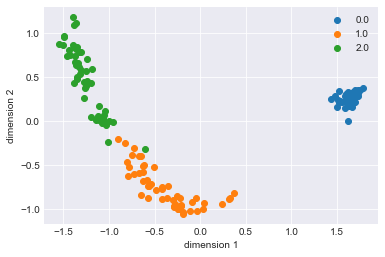

In [32]:
import matplotlib.pyplot as plt 
y =df['class'].values +1
with plt.style.context("seaborn-darkgrid"):
    for l in np.unique(y):
        plt.scatter(coordinate_X[y==l,0], coordinate_X[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()

# MDS library example 
- 각 도시별 거리 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = {'Istanbul':[0,350,329,360,483,1048],
          'Ankara':[350,0,522,405,387,719],
          'Izmir':[329,522,0,186,359,1231],
          'Denizli':[360,405,186,0,174,1082],
          'Antalya':[483,387,359,174,0,981],
          'Erzurum':[1048,719,1231,1082,981,0],
          }
df = pd.DataFrame(cities, index =['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum'])
df

,Istanbul,Ankara,Izmir,Denizli,Antalya,Erzurum
Istanbul,0,350,329,360,483,1048
Ankara,350,0,522,405,387,719
Izmir,329,522,0,186,359,1231
Denizli,360,405,186,0,174,1082
Antalya,483,387,359,174,0,981
Erzurum,1048,719,1231,1082,981,0


c:\Users\dags8\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


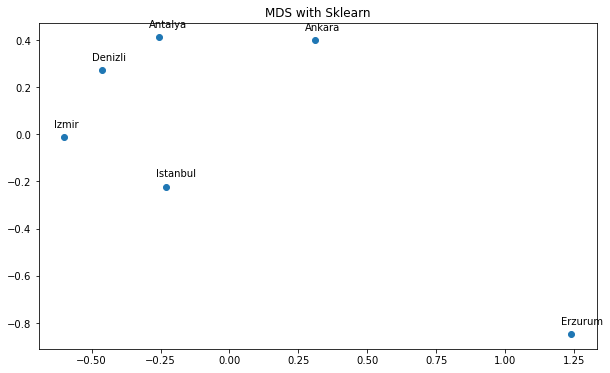

0.18516877484412345


In [1]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)


from sklearn.manifold import MDS
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(x_scaled)
cities = ['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum']

plt.figure(figsize=(10,6))
plt.scatter(x_sklearn[:,0],x_sklearn[:,1])
plt.title('MDS with Sklearn')
for label, x, y in zip(cities, x_sklearn[:, 0], x_sklearn[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()
print(mds_sklearn.stress_)